In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

In [2]:
import os

# Get the current directory
current_dir = os.getcwd()

# Print the current directory
print("Current Directory:", current_dir)

Current Directory: C:\Users\user\Documents\Project


In [3]:
data = pd.read_csv("july/first_week/feat_ext64_norm_mpu2.csv")
data.dtypes.value_counts()
print(data.shape)
Class = pd.read_csv("july/first_week/Ymotion_resize64_fe_mpu2.csv")
print(Class.shape)

(202, 114)
(202, 1)


In [5]:
round(data.describe(),2)

,AccX_mean,AccX_std,AccX_entropy,AccX_skew,AccX_kurtosis,AccX_L1_norm,AccX_SMA,AccX_pos,AccY_mean,AccY_std,...,AccY_SMA,AccY_pos,AccZ_mean,AccZ_std,AccZ_entropy,AccZ_skew,AccZ_kurtosis,AccZ_L1_norm,AccZ_SMA,AccZ_pos
count,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,...,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00,222.00
mean,0.01,0.21,2.99,-0.09,1.17,24.50,0.19,97.74,-0.86,0.17,...,0.89,-7189.86,0.03,0.24,2.95,0.36,1.35,30.96,0.24,217.11
std,0.11,0.10,0.25,0.77,3.93,10.07,0.08,962.78,0.15,0.18,...,0.08,1151.38,0.18,0.12,0.25,0.99,3.44,15.31,0.12,1599.24
min,-0.45,0.03,2.23,-4.79,-1.66,4.75,0.04,-4734.43,-0.99,0.01,...,0.55,-8143.64,-0.39,0.04,2.45,-2.32,-1.56,5.07,0.04,-3030.85
25%,-0.06,0.13,2.81,-0.48,-0.55,17.40,0.14,-529.66,-0.95,0.06,...,0.87,-7848.50,-0.11,0.16,2.78,-0.21,-0.58,19.40,0.15,-989.74
50%,0.03,0.20,2.92,-0.08,0.02,24.01,0.19,261.17,-0.92,0.10,...,0.92,-7617.53,0.01,0.22,2.92,0.28,0.06,27.69,0.22,84.93
75%,0.08,0.28,3.15,0.31,1.50,30.98,0.24,700.62,-0.85,0.21,...,0.95,-7196.04,0.16,0.30,3.12,0.82,2.02,39.73,0.31,1478.46
max,0.26,0.51,3.69,2.67,40.00,61.44,0.48,2231.48,-0.19,0.76,...,0.99,-2543.66,0.52,0.63,3.74,3.84,27.31,76.03,0.59,4026.22


In [17]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
AccX_mean,221
AccX_min,221
AccX_max,221
AccX_std,221
AccX_max_to_min,221
...,...
total_angular_velocity_mean_abs_change,66
total_angular_velocity_mean_change_of_abs_change,7
total_linear_acceleration_std,97


In [6]:
data.columns

Index(['AccX_mean', 'AccX_std', 'AccX_entropy', 'AccX_skew', 'AccX_kurtosis',
       'AccX_L1_norm', 'AccX_SMA', 'AccX_pos', 'AccY_mean', 'AccY_std',
       'AccY_entropy', 'AccY_skew', 'AccY_kurtosis', 'AccY_L1_norm',
       'AccY_SMA', 'AccY_pos', 'AccZ_mean', 'AccZ_std', 'AccZ_entropy',
       'AccZ_skew', 'AccZ_kurtosis', 'AccZ_L1_norm', 'AccZ_SMA', 'AccZ_pos'],
      dtype='object')

In [4]:
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score,mean_squared_error
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import label_binarize

In [23]:
Class = Class.reset_index(drop=True)
data = data.reset_index(drop=True)
data.head()

,AccX_mean,AccX_min,AccX_max,AccX_std,AccX_max_to_min,AccX_mean_abs_change,AccX_mean_change_of_abs_change,AccX_abs_max,AccX_abs_min,AccY_mean,...,total_angular_velocity_abs_min,total_linear_acceleration_mean,total_linear_acceleration_min,total_linear_acceleration_max,total_linear_acceleration_std,total_linear_acceleration_max_to_min,total_linear_acceleration_mean_abs_change,total_linear_acceleration_mean_change_of_abs_change,total_linear_acceleration_abs_max,total_linear_acceleration_abs_min
0,0.035655,-0.639648,0.851562,0.122686,-1.331298,0.024588,-0.000002,0.851562,0.000000,-1.038286,...,3.430200,1.090746,0.946284,2.130346,0.146255,2.251276,0.019463,0.000024,2.130346,0.946284
1,0.015797,-0.410645,0.555664,0.101517,-1.353149,0.016147,-0.000018,0.555664,0.000488,-1.011135,...,0.784887,1.040508,0.875264,1.687416,0.089811,1.927895,0.012326,-0.000252,1.687416,0.875264
2,0.045340,-0.218506,0.202393,0.064988,-0.926258,0.014151,-0.000060,0.218506,0.000732,-1.022955,...,0.654933,1.067434,0.923788,1.614508,0.085473,1.747704,0.015240,-0.000051,1.614508,0.923788
3,0.027152,-0.358398,0.317627,0.070539,-0.886241,0.013805,-0.000009,0.358398,0.000977,-1.015919,...,1.695602,1.041273,0.956176,1.630610,0.069831,1.705346,0.013933,-0.000038,1.630610,0.956176
4,0.044982,-0.356934,0.461426,0.075851,-1.292749,0.015353,-0.000008,0.461426,0.000000,-1.021980,...,3.443764,1.043920,0.879810,2.237123,0.116111,2.542734,0.017484,0.000002,2.237123,0.879810


In [5]:
# Set up X and y variables
y, X = Class, data

print(X.iloc[2])

AccX_mean                       -0.047729
AccX_min                        -0.044674
AccX_max                         0.156446
AccX_std                         0.052069
AccX_max_to_min                 -0.211463
                                   ...   
L1_norm_acceleration_abs_max     0.084892
L1_norm_acceleration_abs_min     0.022844
L1_norm_acceleration_entropy     0.067042
L1_norm_acceleration_skew        0.144410
L1_norm_acceleration_kurtosis    0.180718
Name: 2, Length: 114, dtype: float64


In [11]:
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# using 10-fold Cross Validation technique and grid search
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 10

# Initialize the KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the mean squared error for each fold
mse_list = []
Accuracy_list = []
F1_list = []
k_vlue = []
# Loop over the folds
for train_index, test_index in kf.split(X):
    
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Define the range of K values to search over
    k_values = list(range(1, 35))
    
    # Set up the parameter grid for the grid search
    param_grid = {'n_neighbors': k_values}
    
    model = KNeighborsClassifier()
    
    # Initialize the grid search object and fit the grid search object to the training data
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best value of K from the grid search object
    best_k = grid_search.best_params_['n_neighbors']
    
    # Initialize the KNN classifier
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
    
    # Test your model on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error and append it to the mse_list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    # Calculate the Accuracy
    Accuracy_list.append(accuracy_score(y_test, y_pred))
    
    # Calculate the F1 Score
    F1_list.append(f1_score(y_test, y_pred, average='macro'))
    
    # append the best K value
    k_vlue.append(best_k)

# Calculate the mean and standard deviation of the mean squared error across all folds
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

mean_Accu_scr = round(np.mean(Accuracy_list),2)
std_Accu_scr = round(np.std(Accuracy_list),2)

mean_f1 = round(np.mean(F1_list),2)
std_f1 = round(np.std(F1_list),2)

In [8]:
print(f"Mean squared error: {mean_mse:.2f} +/- {std_mse:.2f}")
print(f"Accuracy score: {mean_Accu_scr:.2f} +/- {std_Accu_scr:.2f}")
print(f"F1 score: {mean_f1:.2f} +/- {std_f1:.2f}")
print(k_vlue)

Mean squared error: 0.57 +/- 0.25
Accuracy score: 0.87 +/- 0.07
F1 score: 0.85 +/- 0.07
[8, 9, 16, 6, 7, 15, 14, 5, 8, 16]


In [12]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91         5
         2.0       0.89      0.67      0.76        12
         3.0       0.60      0.86      0.71         7
         4.0       0.88      1.00      0.93         7
         5.0       1.00      0.80      0.89        10

    accuracy                           0.83        41
   macro avg       0.84      0.86      0.84        41
weighted avg       0.86      0.83      0.83        41

Accuracy score:  0.83
F1 Score:  0.84


Text(0.5, 36.72222222222221, 'Ground Truth')

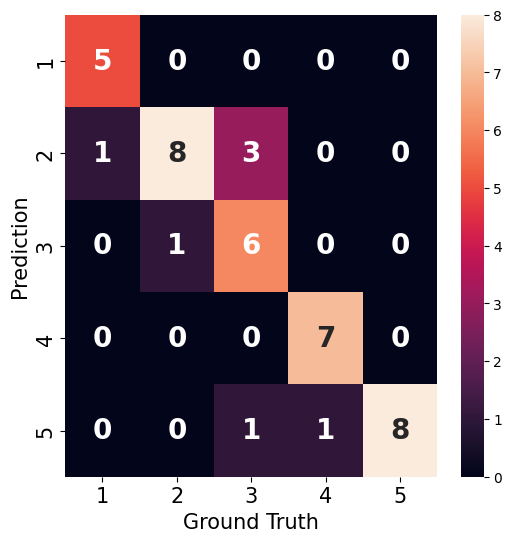

In [13]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['1','2','3','4','5']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

In [14]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test,average='macro')
    f1_scores.append((k, round(f1_score(y_test, y_pred, average='macro'), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

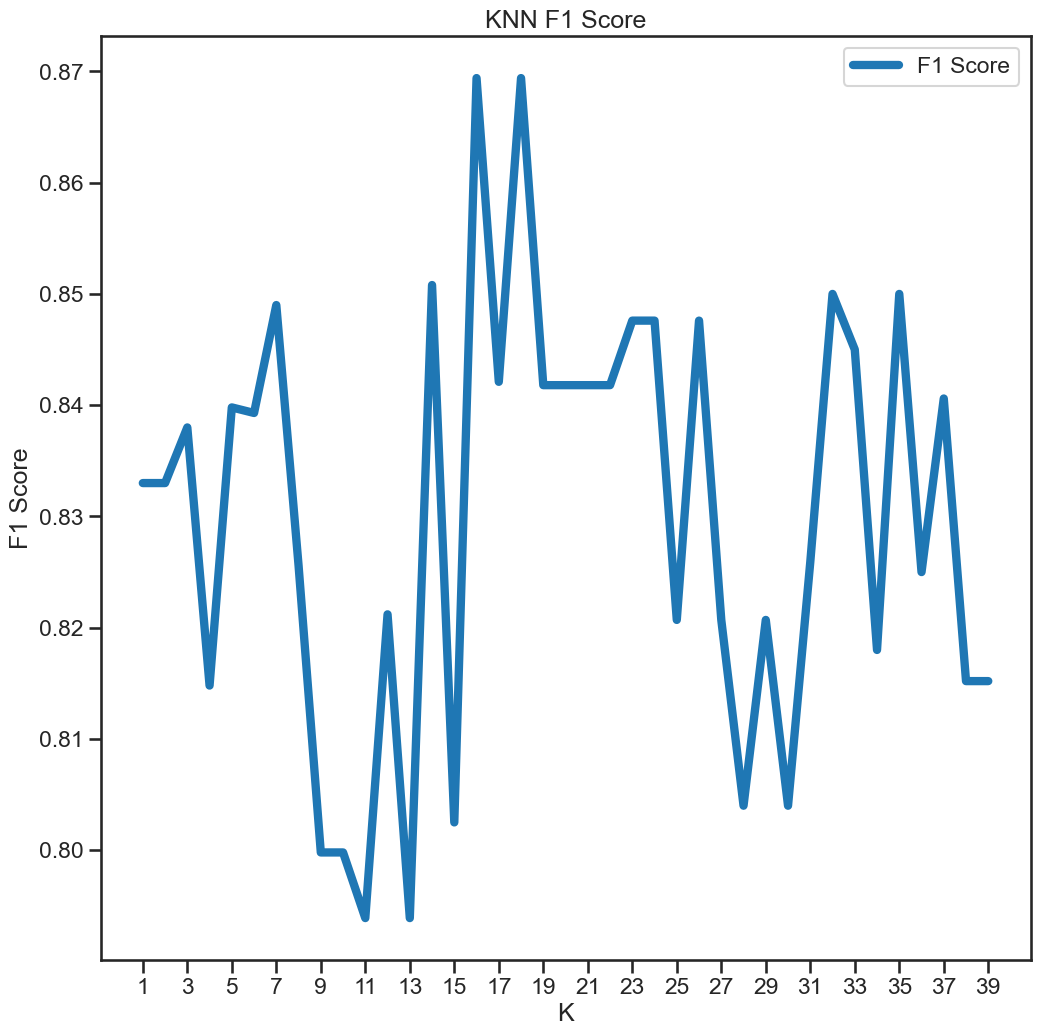

In [15]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

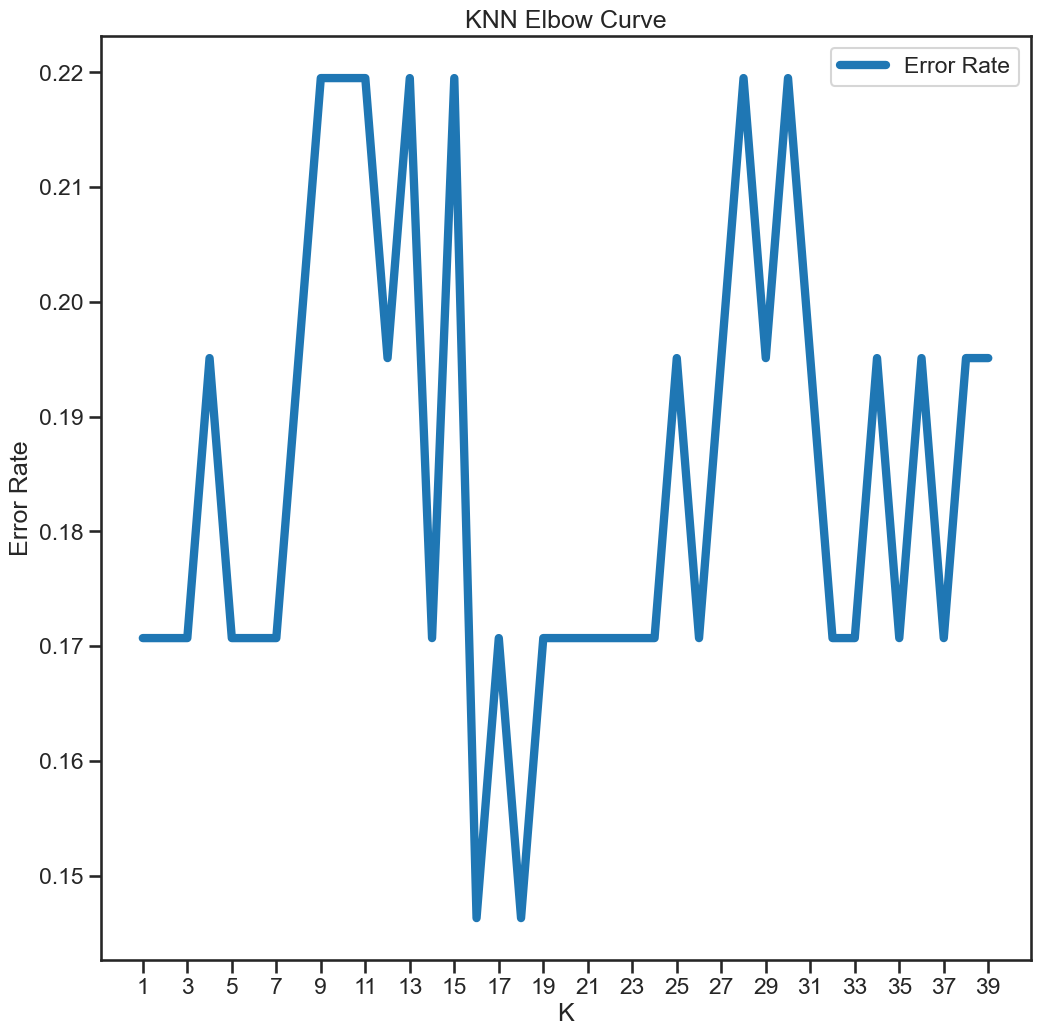

In [16]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

In [17]:

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for K
param_grid = {'n_neighbors': range(1, 35)}

# Define the grid search with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10)

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameter and the corresponding mean cross-validated score
print("Best K value:", grid_search.best_params_['n_neighbors'])
print("Best score:", grid_search.best_score_)

# Get the results for each value of K
results = grid_search.cv_results_

# Print the accuracy and F1 score for each value of K
for mean_score, params in zip(results['mean_test_score'], results['params']):
    k_value = params['n_neighbors']
    knn = KNeighborsClassifier(n_neighbors=k_value)
    scores = cross_val_score(knn, X, y, cv=10)
    # Split the data into training and test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    accuracy = accuracy_score(y_test, knn.fit(X_train, y_train).predict(X_test))
    f1 = f1_score(y_test, knn.fit(X_train, y_train).predict(X_test), average='weighted')
    print("K =", k_value)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print()

Best K value: 6
Best score: 0.8664285714285714
K = 1
Accuracy: 0.8292682926829268
F1 Score: 0.8342237708091367

K = 2
Accuracy: 0.8048780487804879
F1 Score: 0.8149032539276441

K = 3
Accuracy: 0.8048780487804879
F1 Score: 0.8117223124396726

K = 4
Accuracy: 0.8048780487804879
F1 Score: 0.8117223124396726

K = 5
Accuracy: 0.7804878048780488
F1 Score: 0.7881965794447862

K = 6
Accuracy: 0.8292682926829268
F1 Score: 0.8305295214907841

K = 7
Accuracy: 0.8048780487804879
F1 Score: 0.8069276491084239

K = 8
Accuracy: 0.8048780487804879
F1 Score: 0.8159219186176825

K = 9
Accuracy: 0.7804878048780488
F1 Score: 0.7865633724427048

K = 10
Accuracy: 0.7804878048780488
F1 Score: 0.7822843822843821

K = 11
Accuracy: 0.7804878048780488
F1 Score: 0.7732524215194305

K = 12
Accuracy: 0.8048780487804879
F1 Score: 0.8050486099266587

K = 13
Accuracy: 0.7804878048780488
F1 Score: 0.7732524215194305

K = 14
Accuracy: 0.8292682926829268
F1 Score: 0.8300723666577325

K = 15
Accuracy: 0.7804878048780488
F1